In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(tf.test.is_gpu_available())
print('-'*30)
print(tf.test.gpu_device_name())
print('-'*30)
print(tf.config.list_physical_devices('GPU'))
print('-'*30)
print(device_lib.list_local_devices())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
------------------------------
/device:GPU:0
------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
------------------------------
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6593605547789184683
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10317004800
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10918168492399093519
physical_device_desc: "device: 0, name: NVIDIA TITAN V, pci bus id: 0000:01:00.0, compute capability: 7.0"
xla_global_id: 416903419
]


In [3]:
segseg_path = r'N:\2_Analysis\automated_analysis\cynch_segmentations\segseg_subtract_vessel_mb-reviewed'
vessel_path = r'N:\2_Analysis\automated_analysis\cynch_segmentations\vessel_segmentation_summer2021_ALL'

output_dir = r'N:\2_Analysis\automated_analysis\flint_segmentations\segseg_subtract_vessel_masks/'

print(segseg_path)
print(vessel_path)
print(output_dir)

N:\2_Analysis\automated_analysis\cynch_segmentations\segseg_subtract_vessel_mb-reviewed
N:\2_Analysis\automated_analysis\cynch_segmentations\vessel_segmentation_summer2021_ALL
N:\2_Analysis\automated_analysis\flint_segmentations\segseg_subtract_vessel_masks/


In [4]:
def get_all_paths(study_folder):
    paths=[]
    for path in os.listdir(study_folder):
        rpath = os.path.join(study_folder, path)
        paths.append(rpath)
    return paths

In [5]:
segseg_paths = get_all_paths(segseg_path)
vessel_paths = get_all_paths(vessel_path)

print(len(segseg_paths))
print(len(vessel_paths))

print(segseg_paths[5])
print(vessel_paths[5])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\vessel_segmentation_summer2021_ALL'

N:\2_Analysis\automated_analysis\cynch_segmentations\segmental_segmentations\caudate_edits\c_1459_edited.nii


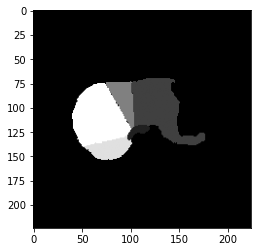

(224, 224, 23)

In [6]:
print(segseg_paths[5])
seg_ni = nib.load(segseg_paths[5])
seg = seg_ni.get_fdata()
seg = np.flip(np.rot90(seg), 1)

plt.imshow(seg[:,:,15], cmap='gray')
plt.show()

seg.shape

N:\2_Analysis\automated_analysis\cynch_segmentations\vessel_segmentation_summer2021_ALL\c_1459.nii.gz


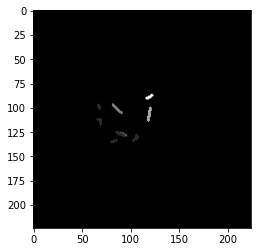

6.0

In [7]:
print(vessel_paths[5])
vessel_ni = nib.load(vessel_paths[5])
vessel = vessel_ni.get_fdata()
vessel = np.flip(np.rot90(vessel), 1)

plt.imshow(vessel[:,:,15], cmap='gray')
plt.show()

vessel.max()

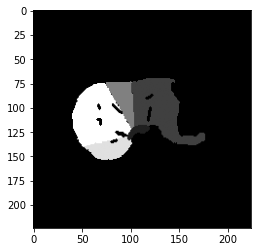

(224, 224, 23)

In [9]:
seg_sub = seg
seg_sub[vessel != 0] = 0

plt.imshow(seg_sub[:,:,15], cmap='gray')
plt.show()

seg_sub.shape

In [34]:
test_seg = segseg_paths[:5]
test_vessel = vessel_paths[:5]

print(test_seg[2])
print(test_vessel[2])

N:\2_Analysis\automated_analysis\cynch_segmentations\segmental_segmentations\caudate_edits\c_1370_edited.nii
N:\2_Analysis\automated_analysis\cynch_segmentations\vessel_segmentation_summer2021_ALL\c_1370.nii.gz


In [35]:
for i in enumerate(test_seg):
    name = i[1][91:]
    name = name[:6]
    print(name)

c_1309
c_1326
c_1370
c_1445
c_1453


In [37]:
def subtract_vessels(segseg_path, vessel_path):
    for i in enumerate(segseg_path):
        num = int(i[0])
        
        name = i[1][91:]
        name = name[:6]
    
        seg_ni = nib.load(segseg_path[num])
        seg = seg_ni.get_fdata()
        seg = np.flip(np.rot90(seg), 1)
    
        vessel_ni = nib.load(vessel_path[num])
        vessel = vessel_ni.get_fdata()
        vessel = np.flip(np.rot90(vessel), 1)
    
        seg_sub = seg
        seg_sub[vessel != 0] = 0
        
        seg_vessel_ni = nib.Nifti1Image(np.flip(np.rot90(seg_sub,3),0), vessel_ni.affine)
    
        nib.save(seg_vessel_ni, output_dir + name + '.nii')

In [13]:
subtract_vessels(segseg_paths, vessel_paths)

In [ ]:
subtract_vessels)test_